Xây dựng mạng ANN phân lớp chữ cái viết tay. Khai báo các gói numpy, mnist, keras
https://victorzhou.com/blog/keras-neural-network-tutorial/

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist

Lấy dữ liệu từ mnist. Có 2 tập train và test


In [3]:
#@tf.autograph.experimental.do_not_convert
#import warnings
#warnings.filterwarnings('ignore')

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Có 60000 ảnh train và 10000 ảnh để test

In [6]:
print(test_labels[100])

6


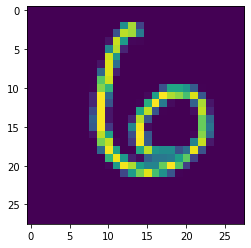

In [7]:
plt.imshow(test_images[100].reshape(28,28))

In [8]:
test_images[100]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 127,
        221,  52,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  64, 229,
        219, 104,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  13, 235, 140,
          4,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 118, 227,  25,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
# Normalize the images.
train_images = (train_images / 255)
test_images = (test_images / 255)

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))


Mạng có 1 lớp vào 784 nút, 2 lớp ẩn mỗi lớp 64 nút, 1 lớp ra 10 nút. Các hàm kích hoạt là relu và softmax

In [10]:
# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

Huấn luyện mạng 

In [13]:
history=model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=32,
)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2721 - accuracy: 0.9209
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1235 - accuracy: 0.9626
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0907 - accuracy: 0.9729
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0715 - accuracy: 0.9779
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0579 - accuracy: 0.9819
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0492 - accuracy: 0.9846
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0421 - accuracy: 0.9866
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0347 - accuracy: 0.9886
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0318 - accuracy: 0.9898
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.027

In [14]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


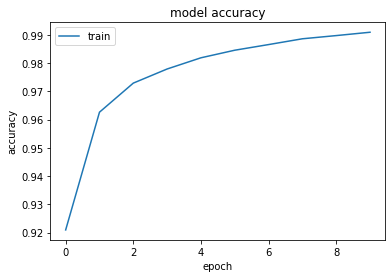

In [15]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

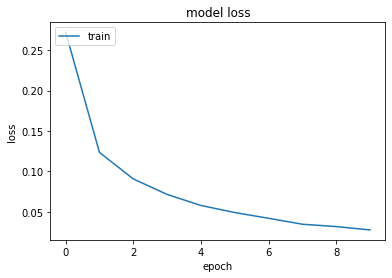

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 1s 1ms/step - loss: 0.1095 - accuracy: 0.9712


[0.1095476821064949, 0.9711999893188477]

In [18]:
import keras
model.save('model.h5')

In [19]:
print(test_labels[0])

7


In [20]:
kq = model.predict(test_images[:10])
kq

array([[5.93833142e-13, 1.99954357e-07, 6.15869021e-06, 2.21169175e-05,
        8.64717965e-13, 4.16609691e-10, 1.16567372e-15, 9.99971271e-01,
        2.52079180e-09, 1.67883158e-07],
       [2.91995296e-15, 2.34144615e-08, 1.00000000e+00, 7.42087850e-11,
        3.63221243e-20, 1.98676488e-16, 6.53852578e-16, 2.08983786e-09,
        5.52205613e-14, 3.09803981e-19],
       [2.33727260e-08, 9.99869585e-01, 3.39936287e-06, 6.22642604e-09,
        7.79352922e-05, 5.36892797e-09, 2.46465538e-06, 7.16469401e-07,
        4.56978887e-05, 2.22258350e-07],
       [9.99989629e-01, 4.14578337e-11, 7.64907639e-08, 2.60361883e-08,
        2.40518028e-09, 4.57383805e-07, 3.13519558e-06, 6.64085292e-07,
        4.22888071e-08, 5.89631873e-06],
       [1.48191290e-08, 1.16833044e-05, 1.60055524e-08, 1.86094499e-12,
        9.98738706e-01, 3.39216299e-09, 2.39894604e-07, 9.05874344e-07,
        1.26582293e-07, 1.24830601e-03],
       [1.00060304e-09, 9.99953151e-01, 1.69706897e-08, 1.23280844e-10,
   

In [21]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:10])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:10]) # [7, 2, 1, 0, 4]

[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


Thử lấy model đã lưu trong model.h5 - không phải đào tạo lại

In [22]:
predictions

array([[5.93833142e-13, 1.99954357e-07, 6.15869021e-06, 2.21169175e-05,
        8.64717965e-13, 4.16609691e-10, 1.16567372e-15, 9.99971271e-01,
        2.52079180e-09, 1.67883158e-07],
       [2.91995296e-15, 2.34144615e-08, 1.00000000e+00, 7.42087850e-11,
        3.63221243e-20, 1.98676488e-16, 6.53852578e-16, 2.08983786e-09,
        5.52205613e-14, 3.09803981e-19],
       [2.33727260e-08, 9.99869585e-01, 3.39936287e-06, 6.22642604e-09,
        7.79352922e-05, 5.36892797e-09, 2.46465538e-06, 7.16469401e-07,
        4.56978887e-05, 2.22258350e-07],
       [9.99989629e-01, 4.14578337e-11, 7.64907639e-08, 2.60361883e-08,
        2.40518028e-09, 4.57383805e-07, 3.13519558e-06, 6.64085292e-07,
        4.22888071e-08, 5.89631873e-06],
       [1.48191290e-08, 1.16833044e-05, 1.60055524e-08, 1.86094499e-12,
        9.98738706e-01, 3.39216299e-09, 2.39894604e-07, 9.05874344e-07,
        1.26582293e-07, 1.24830601e-03],
       [1.00060304e-09, 9.99953151e-01, 1.69706897e-08, 1.23280844e-10,
   

In [23]:
# Load the model's saved weights.
#model1= model.load_weights('model.h5')

model1= keras.models.load_model('model.h5')


In [24]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [25]:
#@tf.autograph.experimental.do_not_convert
# Predict on the first 5 test images.
predictions = model1.predict(test_images[:20])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:20]) # [7, 2, 1, 0, 4]

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 8 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
